In [82]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization

In [2]:
import numpy as np
from tensorflow.keras.models import Model

In [4]:
import tensorflow as tf

In [16]:
# Load the data
cifar = tf.keras.datasets.cifar10

(xtrain,ytrain), (xtest,ytest) = cifar.load_data()

In [9]:
xtrain, xtest = xtrain/255.0, xtest/255.0

In [17]:
ytrain, ytest = ytrain.flatten(), ytest.flatten()

In [18]:
print('xtrain and test shapes:', xtrain.shape, ' ', xtest.shape)
print('ytrain and test shape:', ytrain.shape,' ',ytest.shape)

xtrain and test shapes: (50000, 32, 32, 3)   (10000, 32, 32, 3)
ytrain and test shape: (50000,)   (10000,)


In [19]:
# Number of output classes
K = len(set(ytrain))

In [83]:
# Build the model using the functional API
i = Input(shape=xtrain[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [84]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        1849

In [85]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [86]:
r = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), epochs=50)

Epoch 1/50
 266/1563 [====>.........................] - ETA: 4:44 - loss: 2.0820 - accuracy: 0.3615

KeyboardInterrupt: 

In [89]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(xtrain, ytrain, batch_size)
steps_per_epoch = xtrain.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(xtest, ytest), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
  69/1562 [>.............................] - ETA: 5:37 - loss: 1.6112 - accuracy: 0.4357

KeyboardInterrupt: 

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

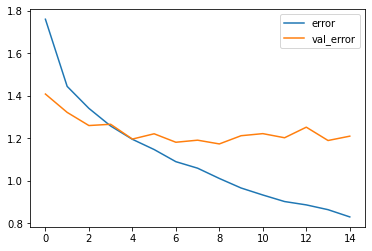

In [45]:
plt.plot(r.history['loss'],label='error')
plt.plot(r.history['val_loss'],label='val_error')
plt.legend()

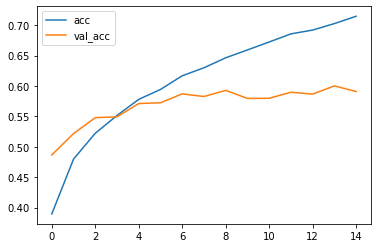

In [48]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

Text(0.5, 1.0, 'Actual: dog ; predicted: bird')

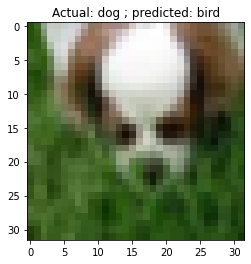

In [77]:
ptest = model.predict(xtest).argmax(axis=1)

errorid = np.where(ptest != ytest)[0]

i = np.random.choice(errorid)

labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

plt.imshow(xtest[i],cmap='gray')
plt.title('Actual: {} ; predicted: {}'.format(labels[ytest[i]],labels[ptest[i]]))